# Análise de Componentes Principais

In [1]:
# bibliotecas necessárias p/ o código
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Obter os dados

Os dados foram obtidos no [site](https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/balanco_programacao_diaria_tm/DicionarioDados_Balanco_Energetico_Programacao_Diaria.pdf) do Operador Nacional do SIstema Elétrico.

In [2]:

df = pd.read_excel('BALANCO_PROGRAMACAO_DIARIA_2023.xlsx')
df = df[ df['id_subsistema']=='SE']


data = np.array(df.iloc[:,3:])
data = StandardScaler().fit_transform(data)
data.shape

(11856, 8)

# PCA Tradicional

PCA utilizando a biblioteca do sklearn. Utilizaremos esse valor como referência para compará-lo com nosso algoritmo online.

In [3]:
pca = PCA(n_components=8)
X2D = pca.fit_transform(data)
W_ref = pca.components_.T

# ONLINE PCA

In [4]:
L , N = data.shape
epoch = 1
mean = 0
lr = 0.001
max_iteration = 300000
Evaluate_periodicity = 1000
alpha = 0.02
p=8
W = np.random.normal(0,0.5,size=(N,p))
MSE_vector=np.ones((int(max_iteration/Evaluate_periodicity),p))
eval_vec_ind = []
m = 0


ind_pres_alg = np.array([]).astype('int')
for _ in range(int((np.ceil(max_iteration/L)))):
    ind_pres_alg = np.append( ind_pres_alg, np.random.permutation(  range(L)  )  )
    
    
for i in range(max_iteration):
    x = np.c_[data[ind_pres_alg[i]]]
    mean = (1-alpha) * mean + x*alpha
    x_centered = x - mean
            
            
    W_ = np.zeros((N,p))
    Xj = np.zeros((N,p))
    for j in range(p):
        v = np.matmul((np.eye(N) - np.matmul(W_,W_.T)),x_centered).reshape(N,)
        Xj[:,j] = v
        W_[:,j] = W[:,j]
            
            
    Tj = x * np.ones((p))
    Ij = Xj
    Uj = np.diag(np.matmul(W.T,Ij))
    W = W + lr*( (Tj- W*Uj ) * Uj)
        
    if i == 1 or (i-1)%Evaluate_periodicity == 0:
        MSE_vector[m] = - np.diag(np.matmul(W_ref.T,W)) / (np.linalg.norm(W,axis=0)*np.linalg.norm(W_ref,axis=0))
        eval_vec_ind.append(i)
        m += 1
            

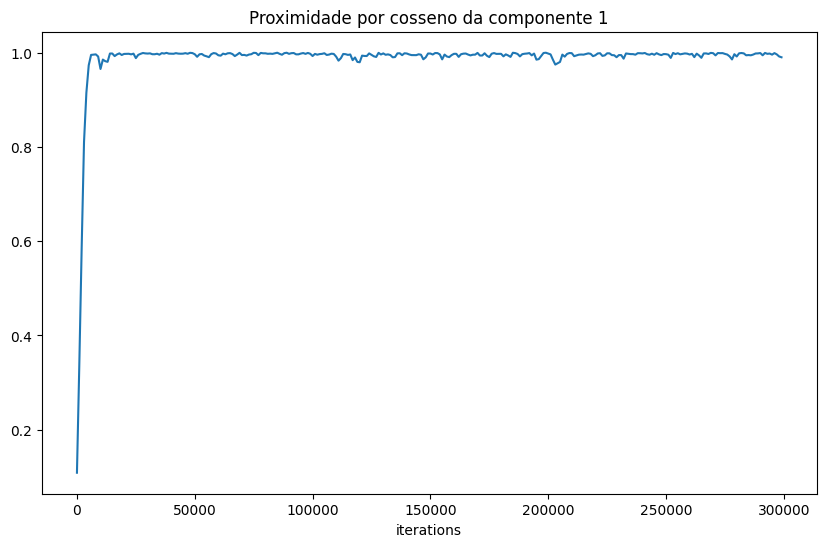

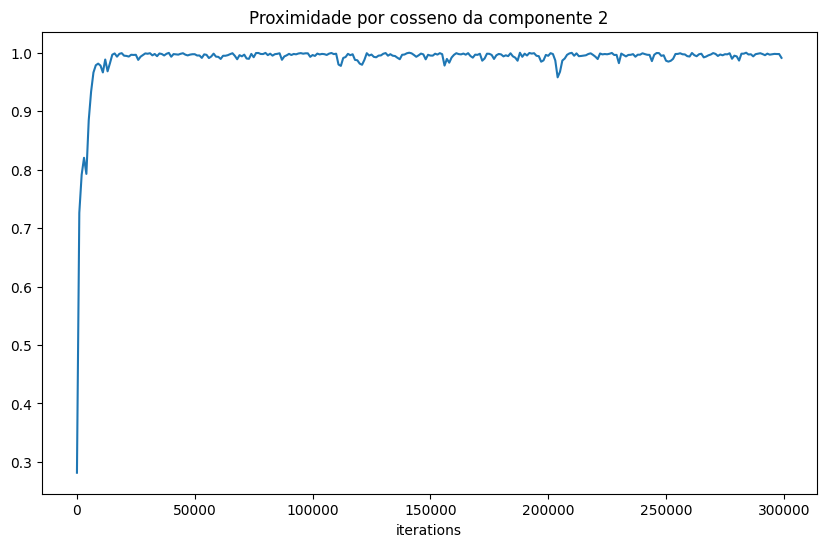

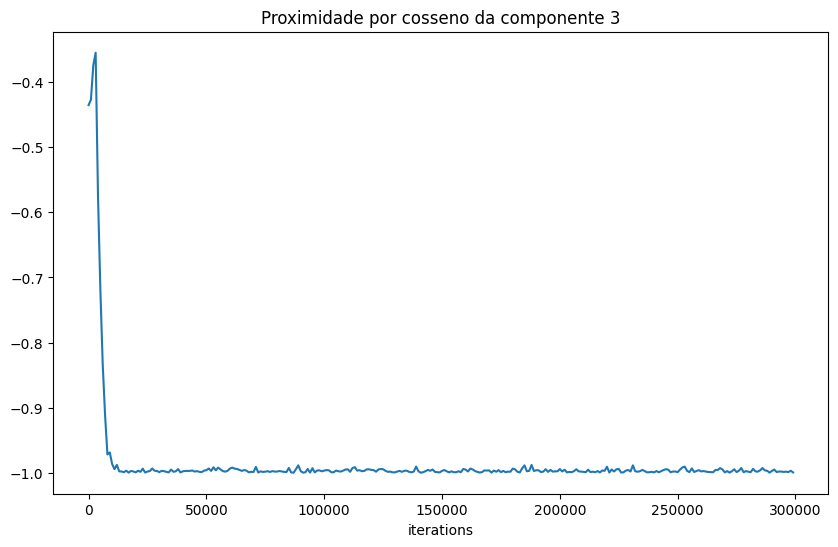

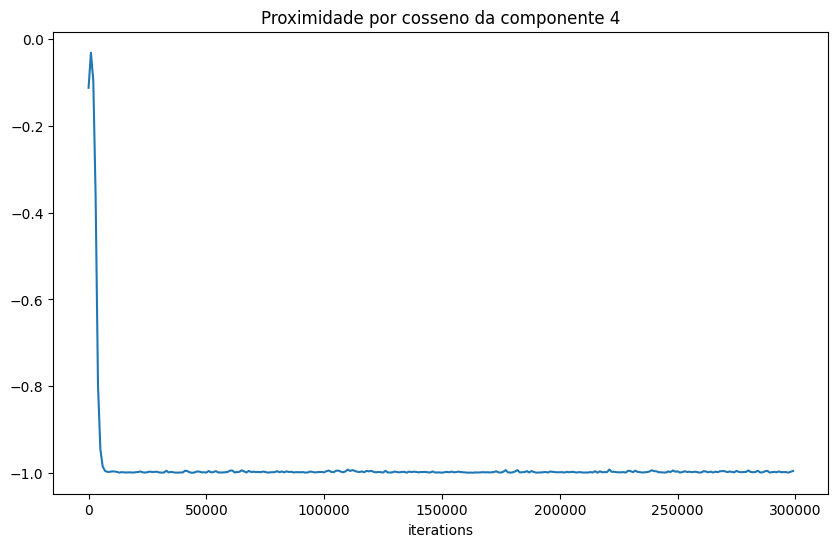

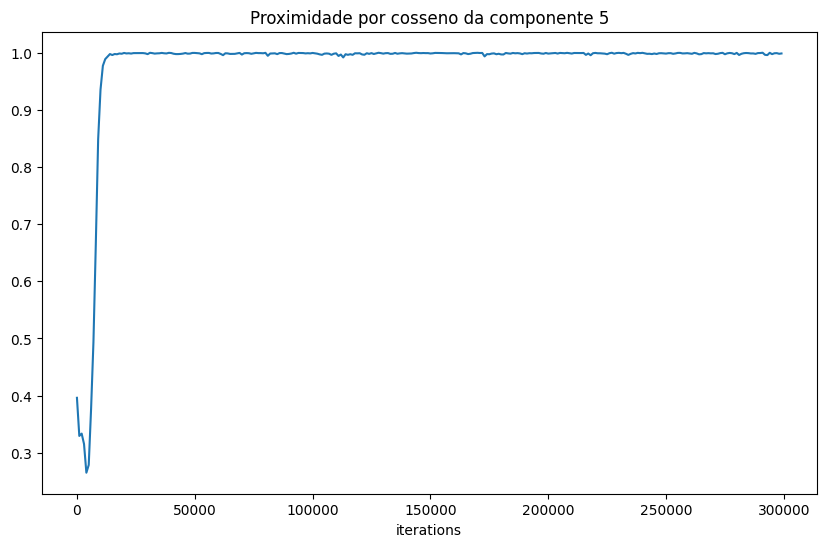

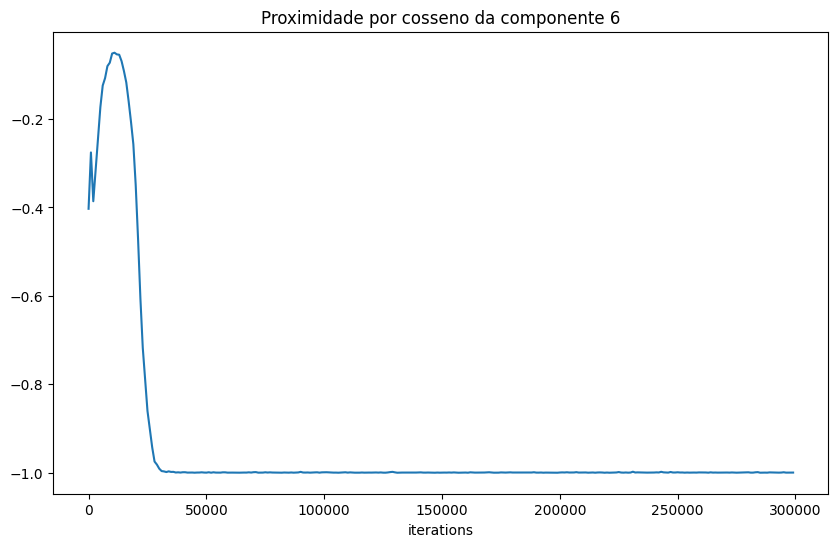

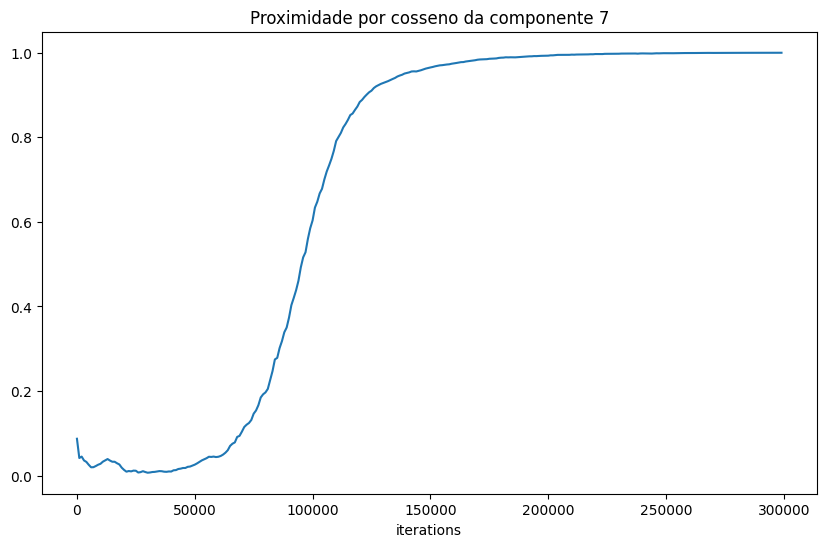

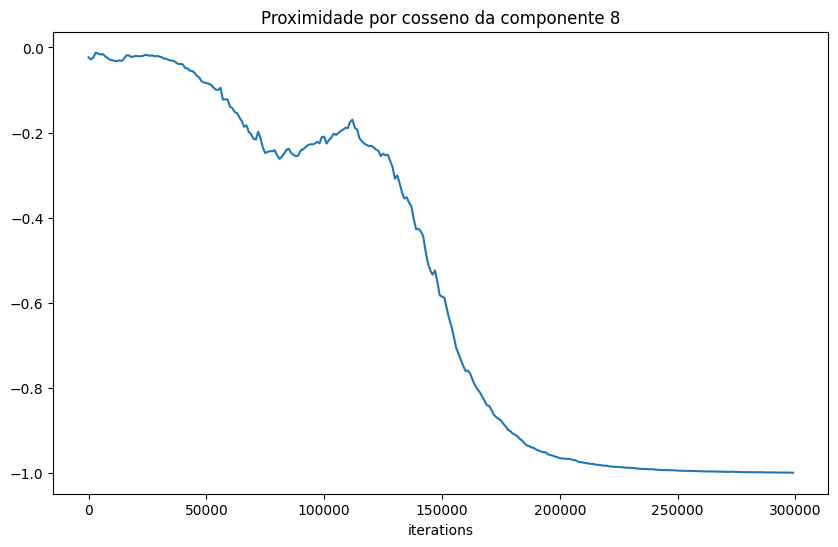

In [5]:
for k in range(p):
    plt.figure(figsize=(10,6))
    plt.plot(eval_vec_ind,MSE_vector[:,k])
    plt.title(f'Proximidade por cosseno da componente {k+1}')
    plt.xlabel('iterations')
    plt.subplots_adjust(hspace=5)
    